## Import Library

In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3
import plotly as py
import plotly.express as px
import warnings
import plotly.io as pio

# Config Default Library
warnings.filterwarnings('ignore')
pio.renderers.default = "notebook_connected"

## Convert Country and Continent Code Function

In [197]:
def dataFrameCountryCode(data,col):
    arr = []
    for i in data[col]:
        try:
            dump = country_name_to_country_alpha2(i)
            arr.append(dump)
        except:
            arr.append(None)
    return pd.DataFrame(arr,columns=['Country Code'])

def dataFrameContinentCode(data,col):
    arr = []
    for x in data[col]:
        try:
            dump = country_alpha2_to_continent_code(x)
            arr.append(dump)
        except:
            arr.append(None)
    return pd.DataFrame(arr,columns=['Continent Code'])

def dataFrameCountryCode3(data,col):
    arr = []
    for x in data[col]:
        try:
            dump = country_name_to_country_alpha3(x)
            arr.append(dump)
        except:
            arr.append(None)
    return pd.DataFrame(arr,columns=['Country Code Alpha 3'])

## Reading The Csv Data

In [198]:
df = pd.read_csv('./covid_worldwide.csv')
df.drop(columns=['Population'],inplace=True)
df.dropna(inplace=True)
df.drop(columns='Serial Number', inplace=True)
df = df.apply(lambda x: x.str.replace(',', ''))
df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test']] = df[[
    'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test']].astype('int64')
df = df.replace(['S. Korea','UK'],['South Korea','United Kingdom'])
df.reset_index(inplace=True)
cc = dataFrameCountryCode(data=df,col='Country')
cc.reset_index(inplace=True)
df['Country Code'] = cc['Country Code']
conc = dataFrameContinentCode(data=df,col='Country Code')
conc.reset_index()
df['Continent Code'] = conc['Continent Code']
alp3 = dataFrameCountryCode3(data=df,col='Country')
alp3.reset_index(inplace=True)
df['Country Code Alpha 3'] = alp3['Country Code Alpha 3']
df.dropna(how='any',inplace=True)
df.drop(columns=['index'],inplace=True)
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Country Code,Continent Code,Country Code Alpha 3
0,USA,104196861,1132935,101322779,1741147,1159832679,US,NA,USA
1,India,44682784,530740,44150289,1755,915265788,IN,AS,IND
2,France,39524311,164233,39264546,95532,271490188,FR,EU,FRA
3,Germany,37779833,165711,37398100,216022,122332384,DE,EU,DEU
4,Brazil,36824580,697074,35919372,208134,63776166,BR,SA,BRA
...,...,...,...,...,...,...,...,...,...
190,Nauru,4621,1,4609,11,20509,NR,OC,NRU
191,Anguilla,3904,12,3879,13,51382,AI,NA,AIA
192,Macao,3488,120,3357,11,7850,MO,AS,MAC
194,Wallis and Futuna,3427,7,438,2982,20508,WF,OC,WLF


## Lima Negara Teratas Dengan Kasus Covid-19 Tertinggi

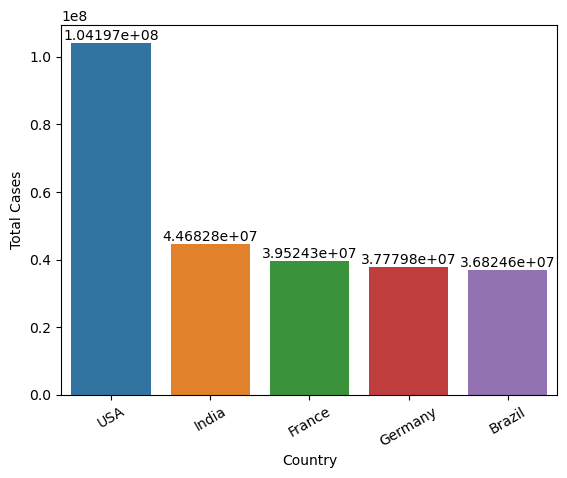

In [199]:
dc = df[['Country', 'Total Cases']]
topCasesTop5 = dc.sort_values(by='Total Cases', ascending=False).head(5)
dp = sns.barplot(data=topCasesTop5, x='Country', y='Total Cases')
for i in dp.containers:
    dp.bar_label(i,)
plt.xticks(rotation=30)
plt.show()

## Persentase Angka Kematian Tertinggi Kasus Covid-19

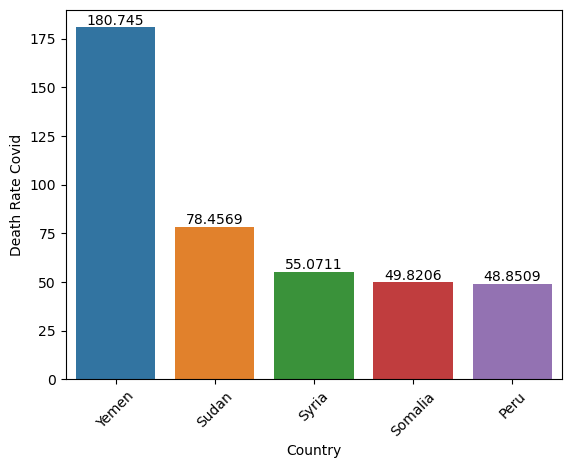

In [200]:
dd = df[['Country','Total Cases','Total Deaths']]
dd['Death Rate Covid'] = dd.apply(lambda x: x['Total Deaths'] / x['Total Cases'] * 1000,axis=1 )
dd = dd.sort_values(by='Death Rate Covid',ascending=False)
ax = sns.barplot(x=dd['Country'].head(),y=dd['Death Rate Covid'].head())
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.show()

## Show World Map Covid 19 Cases

In [201]:
wcm = px.choropleth(locations=df['Country Code Alpha 3'], locationmode='ISO-3',
                    color=df['Total Cases'], title='Total Covid Cases',)
wcm.show()